In [83]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:

num_classes = len(os.listdir("C:/Users/Marco/Desktop/Scuola ITS/robe Git/Vision-Exam/immagini"))
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [92]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

base_dir = 'C:/Users/Marco/Desktop/Scuola ITS/robe Git/Vision-Exam/immagini'
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7180 images belonging to 9 classes.
Found 1795 images belonging to 9 classes.


In [ ]:
hystory = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)


Epoch 1/50


225/225 [==============================] - 28s 126ms/step - loss: 3.3621e-08 - accuracy: 1.0000 - val_loss: 1.4110 - val_accuracy: 0.9086
Epoch 2/50
225/225 [==============================] - 28s 123ms/step - loss: 2.9238e-08 - accuracy: 1.0000 - val_loss: 1.4160 - val_accuracy: 0.9086
Epoch 3/50
225/225 [==============================] - 29s 127ms/step - loss: 2.5519e-08 - accuracy: 1.0000 - val_loss: 1.4215 - val_accuracy: 0.9086
Epoch 4/50
225/225 [==============================] - 28s 125ms/step - loss: 2.3061e-08 - accuracy: 1.0000 - val_loss: 1.4269 - val_accuracy: 0.9086
Epoch 5/50
225/225 [==============================] - 28s 126ms/step - loss: 2.1053e-08 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.9086
Epoch 6/50
225/225 [==============================] - 28s 124ms/step - loss: 1.9143e-08 - accuracy: 1.0000 - val_loss: 1.4376 - val_accuracy: 0.9086
Epoch 7/50
225/225 [==============================] - 28s 124ms/step - loss: 1.7250e-08 - accuracy: 1.0000 - val_loss

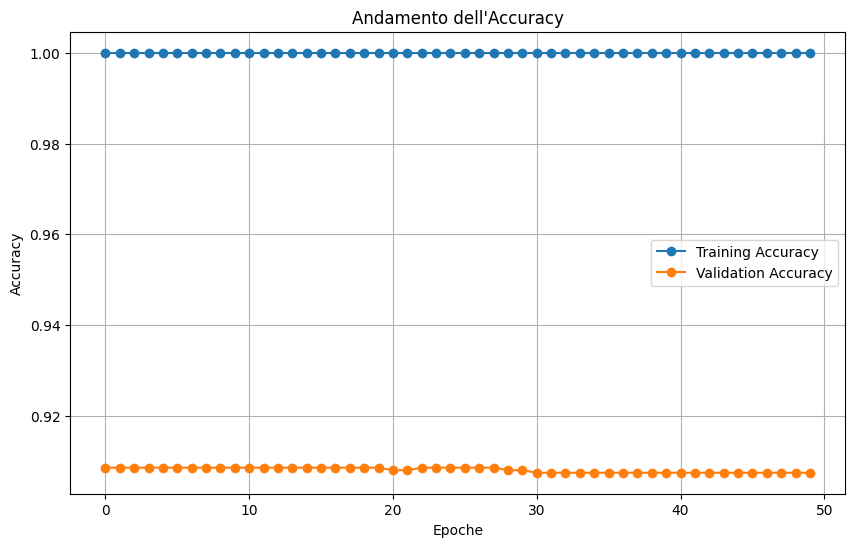

In [90]:
# Esegui il blocco del grafico
plt.figure(figsize=(10, 6))
plt.plot(hystory.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(hystory.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Andamento dell\'Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1795 images belonging to 9 classes.


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)


57/57 [==============================] - 2s 34ms/step


In [ ]:

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
                          precision    recall  f1-score   support

               borraccia       0.93      1.00      0.96       200
   bottiglia di plastica       0.97      0.94      0.96       200
      bottiglia di vetro       0.91      0.94      0.92       200
bottiglietta di plastica       0.94      0.94      0.94       200
                  cuffie       0.91      0.86      0.89       200
                 headset       0.90      0.83      0.86       195
                keyboard       0.88      0.92      0.90       200
                   mouse       0.83      0.88      0.85       200
              smartphone       0.90      0.86      0.88       200

                accuracy                           0.91      1795
               macro avg       0.91      0.91      0.91      1795
            weighted avg       0.91      0.91      0.91      1795

Confusion Matrix:
[[200   0   0   0   0   0   0   0   0]
 [  1 188   2   3   0   0   1   2   3]
 [  3   1 187   2   

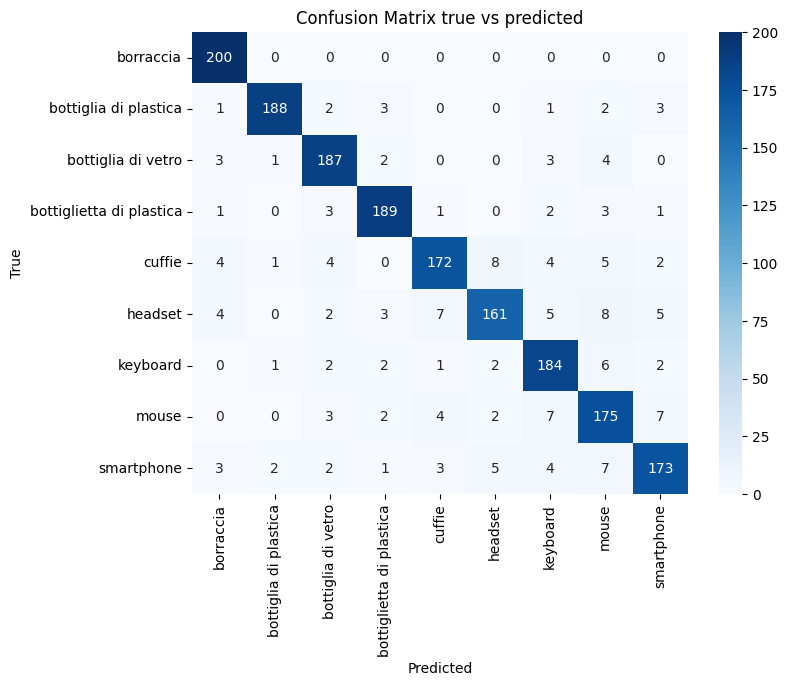

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix true vs predicted' )
plt.show()


In [88]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array



def predict_single_image(model, image_path, class_names):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path, target_size=(128, 128))

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class name
    predicted_class = class_names[predicted_class_index]

    # Get the confidence levels for each class
    confidence_levels = {class_name: confidence * 100 for class_name, confidence in zip(class_names, predictions[0])}

    # Return the results in a dictionary
    result = {
        'Predicted class': predicted_class,
        'Confidence levels': confidence_levels
    }

    return result

In [89]:
# Example of predicting a single image
image_to_predict = "C:/Users/Marco/Desktop/Scuola ITS/robe Git/Vision-Exam/immagini_di_prova/borraccia/borraccia_201.jpg"
class_names = ["borraccia", "bottiglia di plastica", "bottiglia di vetro", "bottiglietta di plastica", "cuffie", "headset", "keyboard", "mouse", "smartphone"]

# Ensure the 'predict_single_image' function is defined or imported

# Get predictions on the single image
prediction_result = predict_single_image(model, image_to_predict, class_names)

# Print the prediction results
for key, value in prediction_result.items():
    if key == "Confidence levels":
        print(f"{key}:")
        for class_name, confidence_level in value.items():
            print(f"  {class_name}: {confidence_level:.2f}%")
    else:
        print(f"{key}: {value}")


1/1 [==============================] - 0s 61ms/step
Predicted class: smartphone
Confidence levels:
  borraccia: 12.51%
  bottiglia di plastica: 11.74%
  bottiglia di vetro: 12.53%
  bottiglietta di plastica: 9.59%
  cuffie: 9.16%
  headset: 9.24%
  keyboard: 8.43%
  mouse: 13.06%
  smartphone: 13.74%


In [ ]:
print("Training Dataset Information:")
print(f"Number of classes: {num_classes}")
print(f"Number of training images: {len(train_generator.classes)}")

print("\nValidation Dataset Information:")
print(f"Number of validation images: {len(test_generator.classes)}")


Training Dataset Information:
Number of classes: 9
Number of training images: 7180

Validation Dataset Information:
Number of validation images: 1795


In [ ]:
print("Model Summary:")
model.summary()


Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 501

In [ ]:
print("\nTesting Dataset Information:")
print(f"Number of testing images: {len(test_generator.classes)}")



Testing Dataset Information:
Number of testing images: 1795


In [ ]:


# Esempio con il tuo percorso dell'immagine
image_path_specific = "C:/Users/Marco/Desktop/Scuola ITS/robe Git/Vision-Exam/immagini_di_prova/headset/headset_4.jpg"
example_specific_actual_class = "headset"

# Carica e pre-elabora l'immagine di test specifica
img_array_specific = load_and_preprocess_image(image_path_specific, target_size=(128, 128))

# Effettua la predizione sul singolo esempio
predictions_specific = model.predict(img_array_specific)
predicted_class_index_specific = np.argmax(predictions_specific[0])
predicted_class_specific = class_names[predicted_class_index_specific]
confidence_specific = predictions_specific[0][predicted_class_index_specific] * 100

print("\nEsempio classificazione:")
print(f"- Immagine: {os.path.basename(image_path_specific)}")
print(f"- Classe Reale: {example_specific_actual_class}")
print(f"- Classe Predetta: {predicted_class_specific}")
print(f"- Confidenza: {confidence_specific:.2f}%")




1/1 [==============================] - 0s 17ms/step

Esempio classificazione:
- Immagine: headset_4.jpg
- Classe Reale: headset
- Classe Predetta: cuffie
- Confidenza: 95.55%
